# Data Visualization with Matplotlib
### Lineplots

Dataset: Immigration to Canada from 1980 to 2013

In [1]:
import numpy as np 
import pandas as pd

In [2]:
# previously cleaned
df_canada = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Setting index to country for easy traversing:

In [3]:
df_canada.set_index('Country', inplace=True)
df_canada.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [4]:
# removing index name
df_canada.index.name = None

Declaring variable that will allow us to easily call upon the full range of years:

(since we converted all of our years to strings)

This will be useful for plotting later on.

In [5]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

#### Visualizing with Matplotlib

We will be using <code>pyplot</code>, Matplotlib's scripting layer.

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# enforcing figure generation in notebook
%matplotlib inline

Extracting data series for Haitian immigration into Canada:

In [7]:
# passing in years var to exclude total column
haiti = df_canada.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<Axes: >

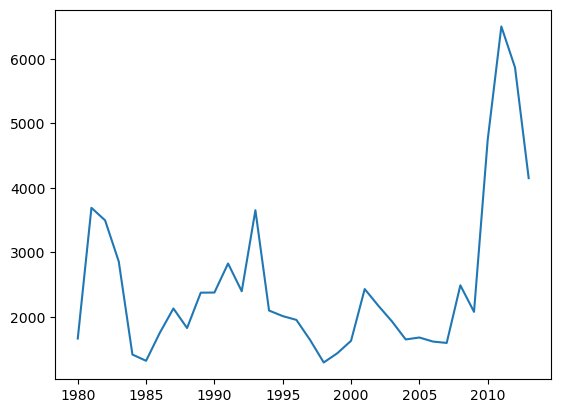

In [8]:
haiti.plot()
# pandas automatically populates the x-axis with the index values(years)
# and y-axis with the column values(population)

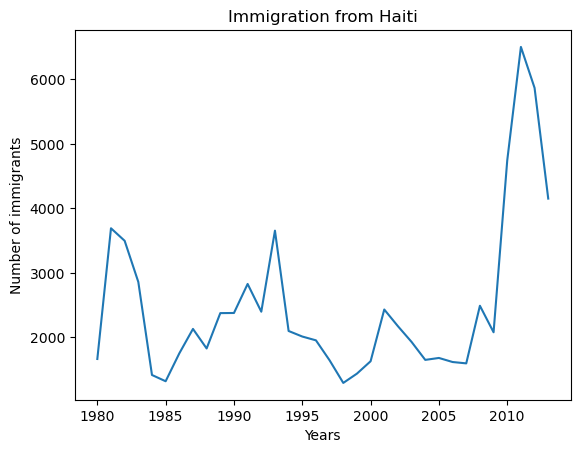

In [9]:
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # shows updates made to figure

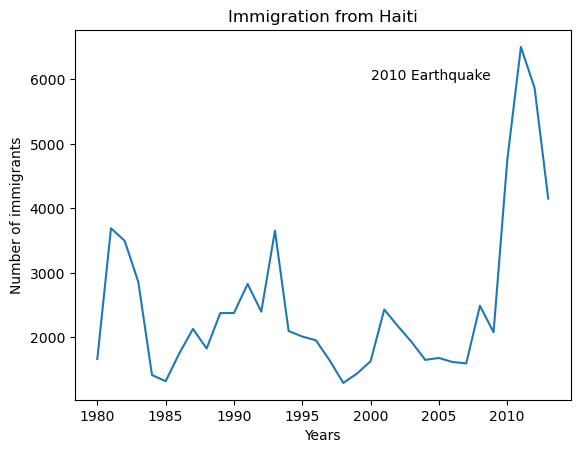

In [10]:
# we need to convert index to integer in order for 
# plt.text(x,y,label) since x and y need to be integer
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')


plt.text(2000, 6000, '2010 Earthquake')

plt.show() # shows updates made to figure

### India vs. China

Getting dataframe for India and China:

In [11]:
india_china_df = df_canada.loc[['India','China'], years]
india_china_df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


Pandas plots the indices on the x-axis and the columns as individual lines on the y-axis.

Since in our dataframe we have <code>Country</code> as the index and years as the columns, our plot would look very wrong. We need to swap these attributes.

We didn't need to transpose when we plotted Haiti because it was a Series.

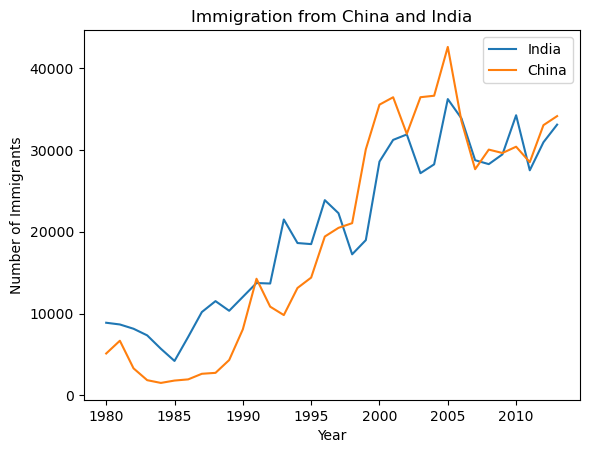

In [12]:
# transpose method swaps index and column
india_china_df = india_china_df.transpose()
india_china_df.plot(kind='line')
plt.title('Immigration from China and India')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

### Visualizing Immigration Trends of the Top 5 Countries

Sorting by total immigration:

In [13]:
df_canada.sort_values(by='Total', ascending=False, axis=0, inplace=True)

Retrieving top 5 countries:

In [14]:
top_5_df = df_canada.head(5)

Swapping index and column values:

In [15]:
top_5_df = top_5_df[years].transpose()

Plotting our datafram and resizing figure:

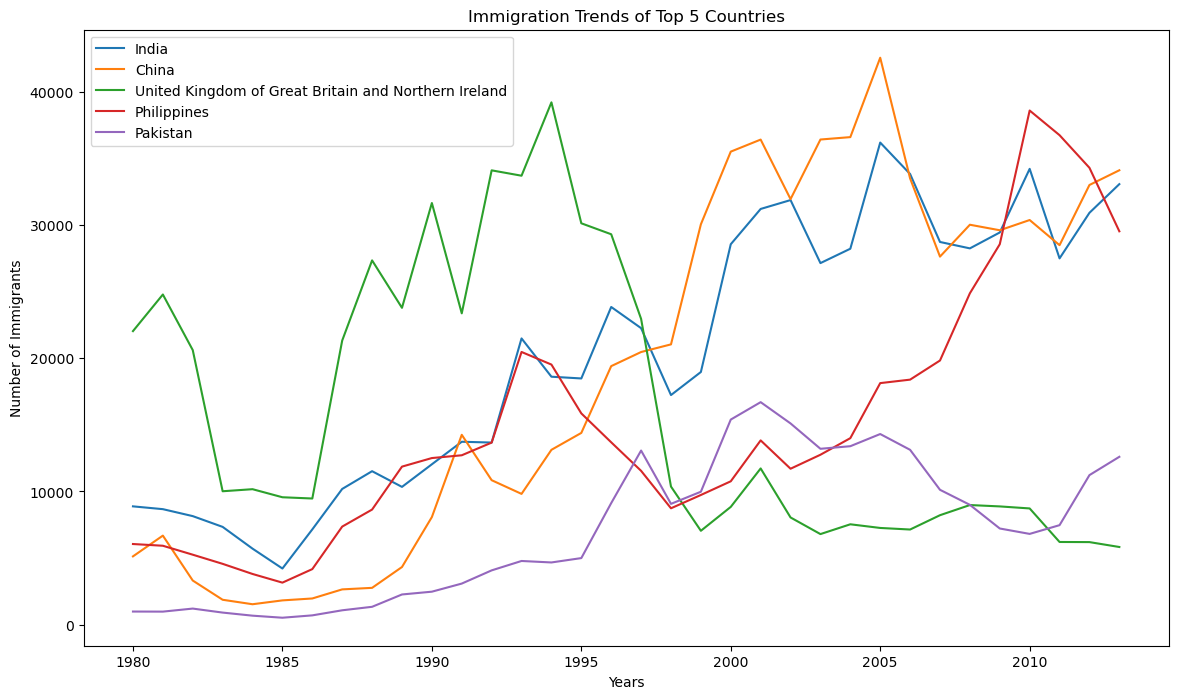

In [16]:
top_5_df.plot(kind='line', figsize=(14,8))

plt.title('Immigration Trends of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()
              